# 🎀 Regresión Lineal Simple

1. Librerías y dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset = pd.read_csv("C:/Users/Alejito/Desktop/machine-learning-level-up/clase08/student_scores.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


2. Gráfico de dispersión

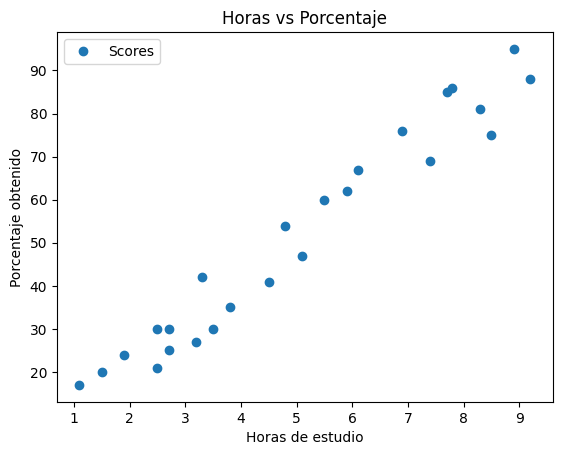

In [9]:
dataset.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Horas vs Porcentaje")
plt.xlabel("Horas de estudio")
plt.ylabel("Porcentaje obtenido")
plt.show()

3. Defino las variables (indep y dep)

In [10]:
x = dataset.iloc[:, :-1].values # Horas. Tomo todos los valores de la columna 0
y = dataset.iloc[:, 1].values # Porcentaje. Tomo todos los valores de la columna 1

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

4. Divido el dataset en entrenamiento y prueba

In [14]:
from sklearn.model_selection import train_test_split # Importo la librería para dividir el dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) # Divido el dataset en entrenamiento 80% y prueba 20%, con random state 0 para que siempre se divida igual

5. Corro el modelo

In [15]:
from sklearn.linear_model import LinearRegression # Importo la librería para regresión lineal
regressor = LinearRegression() # Creo el objeto de regresión lineal
regressor.fit(x_train, y_train) # Entreno el modelo con los datos de entrenamiento

LinearRegression()

6. Predicciones

In [16]:
y_pred = regressor.predict(x_test) # Realizo la predicción con los datos de prueba
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

7. Veo las preddiciones en un df

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # Creo un dataframe con los valores reales y predichos
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


8. Evaluación del modelo

In [21]:
from sklearn.metrics import mean_squared_error# Importo la librería para métricas

#Predicción en Train y Test para comparar desp 
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

#RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE Train: {rmse_train}')
print(f'RMSE Test: {rmse_test}')

RMSE Train: 5.558613350226342
RMSE Test: 4.647447612100367


In [22]:
from sklearn.metrics import r2_score # Importo la librería para el coeficiente de determinación
r2 = r2_score(y_test, y_pred) # Calculo el coeficiente de determinación
print(f'Coeficiente de determinación: {r2}')

Coeficiente de determinación: 0.9454906892105355
